# **Project Name** - Exploratory Data Analysis (EDA) in Telco Customer Churn

### Objective:
To understand customer churn patterns by exploring demographic, service, and usage characteristics in the Telco dataset.

## ***Know the data***

### 1. Import libraries

In [1]:
# 1. Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import warnings as wr
wr.filterwarnings('ignore')

### 2. Dataset loading

In [2]:
# 2. Load the dataset

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

### 3. Overview of the Dataset 

In [3]:
# Dataset First Look

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Dataset Description

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Dataset Rows & Columns count

print(f"Number of Rows : {df.shape[0]}")
print(f"Number of Columns : {df.shape[1]}")

Number of Rows : 7043
Number of Columns : 21


In [7]:
# Dataset features names

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### 4. Check for Anomalies in the Dataset

In [8]:
# Missing values

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# TotalCharges is object but should be float

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
# let us check the information of dataset features again after chaning the TotalCharges data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# Check the dataset description after chaning the TotalCharges data type

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
# Duplicates

df.duplicated().sum()

0

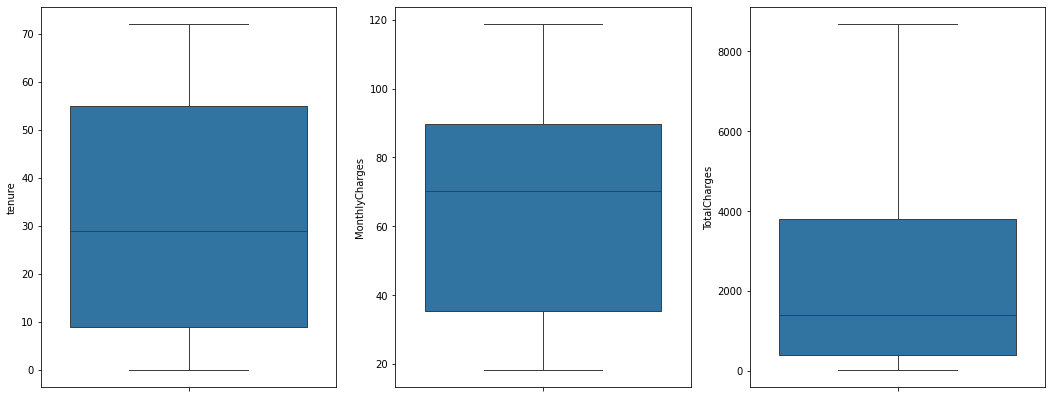

In [13]:
# Outliers detection 

plt.figure(figsize=(18, 7))

# 1st Subplot: outlier detection of tenure
plt.subplot(1, 3, 1)  # Leftmost
sns.boxplot(data=df, y="tenure")

# 2nd Subplot: outlier detection of Monthly Charges
plt.subplot(1, 3, 2)  # Middle
sns.boxplot(data=df, y="MonthlyCharges")

# 3rd Subplot: outlier detection of Total Charges
plt.subplot(1, 3, 3)  # Rightmost
sns.boxplot(data=df, y="TotalCharges")

plt.show()

In [14]:
# Based on the boxplot, none of the columns (tenure, MonthlyCharges, TotalCharges) have data points outside the whiskers.
# Hence, there are no statistical outliers

In [15]:
# Again, we can findout outliers using the IQR 

# Helper function to count outliers
def count_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return len(outliers)

# Columns we want to check
columns = ["tenure", "MonthlyCharges", "TotalCharges"]

# Perform the count
outlier_counts = {col: count_outliers(df, col) for col in columns}
outlier_counts

{'tenure': 0, 'MonthlyCharges': 0, 'TotalCharges': 0}

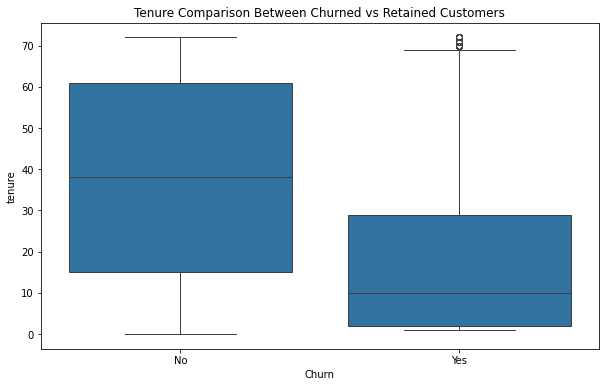

In [16]:
# Compare tenure between churned vs. retained customers

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure Comparison Between Churned vs Retained Customers')
plt.show()

In [17]:
# Retained customers are likely to have longer tenures, while churned customers are likely to have shorter tenures.
# The outliers for churned customers (marked as individual dots above the upper whisker) 
# indicate that a small number of churned customers had unusually long tenures compared to the majority.

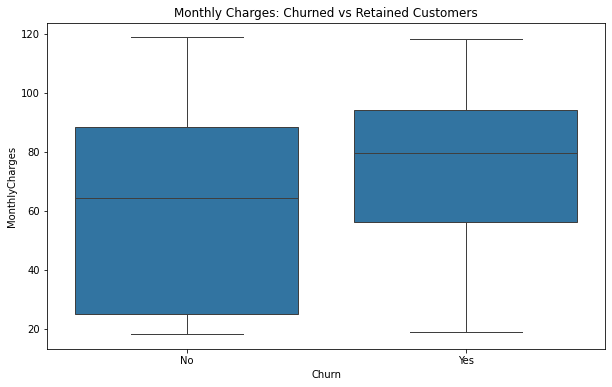

In [18]:
# Compare MonthlyCharges between churned vs. retained customers

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges: Churned vs Retained Customers')
plt.show()

In [19]:
# customers who churned tend to have higher monthly charges compared to those who stayed.
# The median monthly charge is noticeably greater for churned customers, 
# and their overall distribution is more concentrated at the higher end
# so, a possible correlation between higher monthly costs and customer churn.

In [20]:
# Show the actual average tenure statistics for churned vs retained,

average_tenure = df.groupby('Churn')['tenure'].mean()
print(average_tenure)

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64


In [21]:
# Retained customers have an average tenure roughly twice as long as churned customers.
# Churned customers tend to leave within about 1–2 years, indicating early churn risk.
# So, focusing on early engagement and satisfaction within the first 18 months can reduce churn significantly.

In [22]:
# Perform a statistical test (t-test) to confirm the significance on tenure

# Split tenures based on Churn status
tenure_churned = df[df['Churn'] == 'Yes']['tenure']
tenure_retained = df[df['Churn'] == 'No']['tenure']

# Perform independent t-test
t_stat, p_value = ttest_ind(tenure_churned, tenure_retained)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.6f}")

# Interpretation
if p_value < 0.05:
    print("The difference in average tenure between churned and retained customers is statistically significant.")
else:
    print("No significant difference detected.")


T-statistic: -31.580
P-value: 0.000000
The difference in average tenure between churned and retained customers is statistically significant.


In [23]:
# An independent two-sample t-test determines that the average tenure of churned customers is significantly different 
# (and lower) than that of retained customers, with very strong evidence against the null hypothesis.
#  T-statistic: -31.580 indicates the mean tenure of churned and retained customers differs 
# by 31.58 times the standard error — a huge difference.
# the negative sign means that the average tenure of churned customers is lower than that of retained ones.
# (i.e., tenure_churned.mean() < tenure_retained.mean())
# P-value = 0.000000: Indicates an extremely small probability that this difference occurred by chance.
# we know, If p-value < 0.05 → The difference is statistically significant (reject the null hypothesis).
# If p-value ≥ 0.05 → The difference is not significant (fail to reject the null).

### 5. Univariate Analysis

<Axes: xlabel='Churn', ylabel='count'>

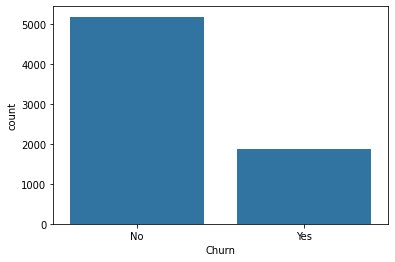

In [24]:
# 5.Univariate Analysis of Categorical feature of target (Churn) variable

sns.countplot(x='Churn', data=df)

In [25]:
# count of unique entries in that column

df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [26]:
# Retained customers are almost 3 times more than churned customers.

<Axes: xlabel='gender', ylabel='count'>

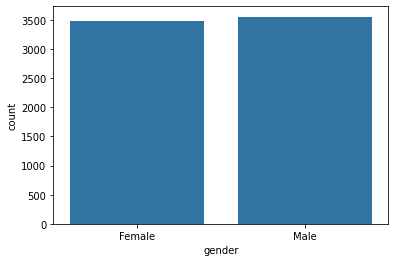

In [27]:
sns.countplot(x='gender', data=df)

In [28]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [29]:
# The gender ratio is almost same

<Axes: xlabel='SeniorCitizen', ylabel='count'>

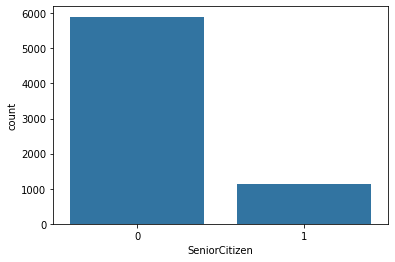

In [30]:
sns.countplot(x='SeniorCitizen', data=df)

In [31]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [32]:
# SeniorCitizen is a binary indicator:
# 0 → The customer is NOT a senior citizen.
# 1 → The customer IS a senior citizen (age 65 or older).
# The majority of customers (more than 80%) are not senior citizens.

<Axes: xlabel='Partner', ylabel='count'>

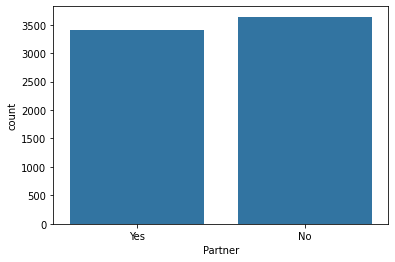

In [33]:
sns.countplot(x='Partner', data=df)

In [34]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [35]:
# Out of the total entries, 3,641 people do not have a partner (No) and 3,402 people do have a partner (Yes).

<Axes: xlabel='Dependents', ylabel='count'>

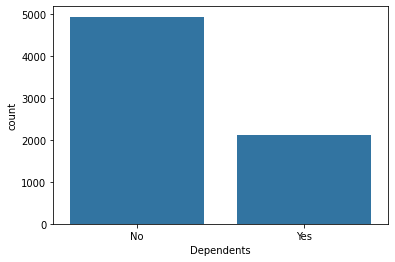

In [36]:
sns.countplot(x='Dependents', data=df)

In [37]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [38]:
# a majority (about 70%) of the individuals do not have dependents, while around 30% do.

<Axes: xlabel='PhoneService', ylabel='count'>

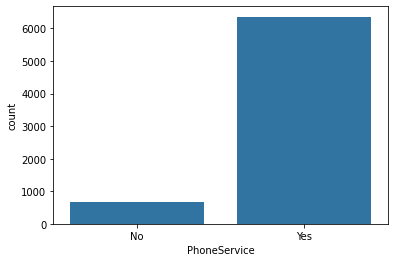

In [39]:
sns.countplot(x='PhoneService', data=df)

In [40]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [41]:
# the vast majority (~90%) of customers have phone service, while only about 10% do not

<Axes: xlabel='MultipleLines', ylabel='count'>

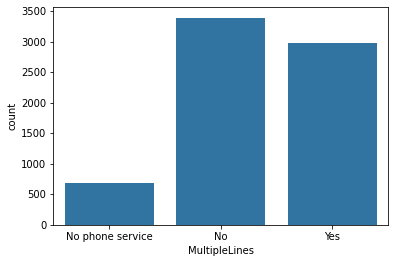

In [42]:
sns.countplot(x='MultipleLines', data=df)

In [43]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [44]:
# Among those with phone service (total = 3,390 + 2,971 = 6,361) 
# 53.3% do not have multiple lines and 46.7% do have multiple lines.
# The 682 entries with No phone service

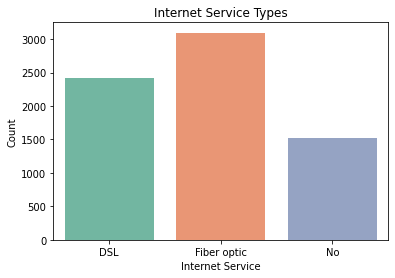

In [45]:
# Count of InternetService

sns.countplot(data=df, x='InternetService', palette='Set2')
plt.title('Internet Service Types')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

In [46]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [47]:
# The majority of customers(3096+241=5517) have some form of internet service while 1526 customers no internet service

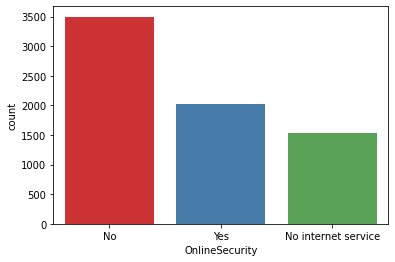

In [48]:
sns.countplot(data=df, x='OnlineSecurity', palette='Set1')
plt.show()

In [49]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [50]:
# Among the internet users (5517), most users(3498) do not subscribe to online security 

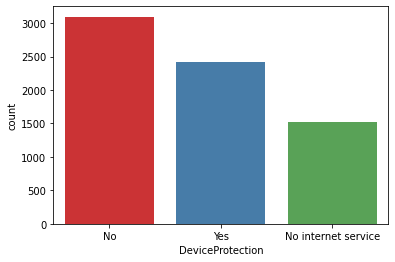

In [51]:
sns.countplot(data=df, x='DeviceProtection', palette='Set1')
plt.show()

In [52]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [53]:
# 56.1% (3,095) do not have device protection while 43.9% (2,422) do have it. 
# we can say, a majority of internet users don't have device protection

<Axes: xlabel='TechSupport', ylabel='count'>

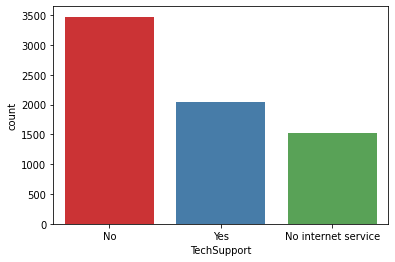

In [54]:
sns.countplot(data=df, x='TechSupport', palette='Set1')

In [55]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [56]:
# Majority of customers do not use Tech Support

<Axes: xlabel='StreamingTV', ylabel='count'>

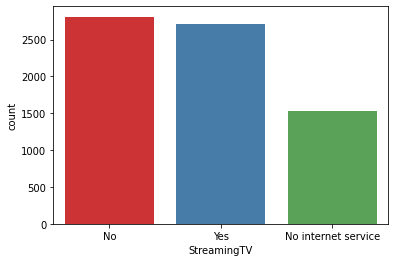

In [57]:
sns.countplot(data=df, x='StreamingTV', palette='Set1')

In [58]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [59]:
# 2,707 customers use streaming TV, while 2,810 customers do not use it, despite having internet.
# There is no strong differentiation between streaming TV users and non-users.

<Axes: xlabel='StreamingMovies', ylabel='count'>

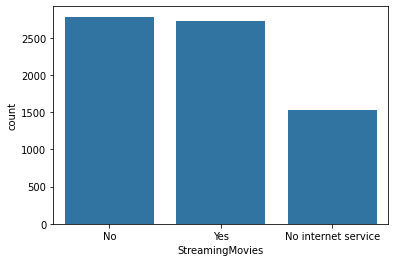

In [60]:
sns.countplot(data=df, x='StreamingMovies')

In [61]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [62]:
# Streaming movies: users and non-users are the same proportion.

<Axes: xlabel='Contract', ylabel='count'>

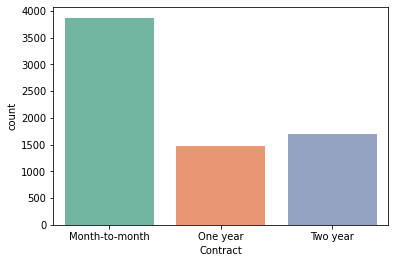

In [63]:
sns.countplot(data=df, x='Contract', palette='Set2')

In [64]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [65]:
# The majority of customers are on Month-to-month contracts, indicating a preference for flexibility.
# In contrast, One-year and Two-year contracts are less common, suggesting fewer customers commit long-term. 
# This distribution is important because month-to-month customers are typically more likely to churn

<Axes: xlabel='PaperlessBilling', ylabel='count'>

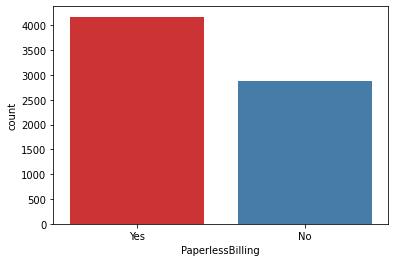

In [66]:
sns.countplot(data=df, x='PaperlessBilling', palette='Set1')

In [67]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [68]:
# Most customers (4,171) use Paperless Billing, while 2,872 prefer paper bills.

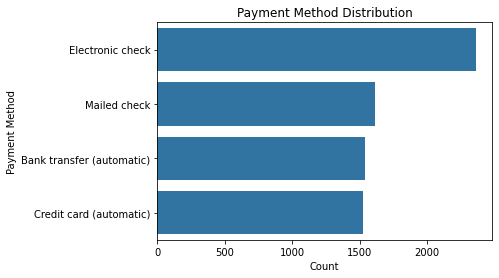

In [69]:
# Count of PaymentMethod

sns.countplot(data=df, y='PaymentMethod', order=df['PaymentMethod'].value_counts().index)
plt.title('Payment Method Distribution')
plt.xlabel('Count')
plt.ylabel('Payment Method')
plt.show()

In [70]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [71]:
# Electronic check is the most used payment method (2,365), followed by mailed check (1,612).
# Automatic payments via bank transfer (1,544) and credit card (1,522) are slightly less common

<Axes: xlabel='tenure', ylabel='Count'>

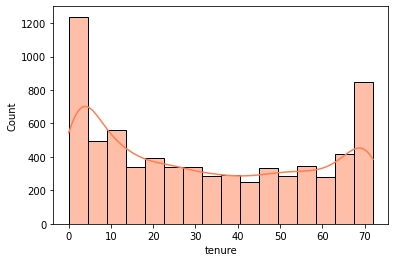

In [72]:
# Numerical

sns.histplot(df['tenure'], kde=True, color='coral')

In [73]:
# The tenure distribution is bimodal, with peaks at low (0–5 months) and high (around 70 months) values.
# This indicates many new and long-term customers, but fewer mid-term ones, suggesting early churn and long-term loyalty.

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

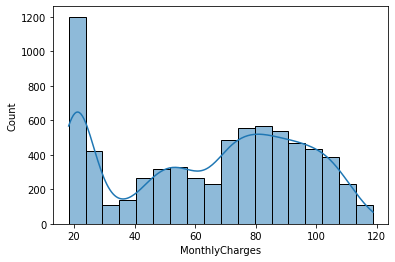

In [74]:
sns.histplot(df['MonthlyCharges'], kde=True)

In [75]:
# The distribution is right-skewed and multimodal, with many customers paying around $20 and a broad cluster between $70–$100. 
# This suggests a mix of low-cost plans (possibly basic services) and higher-tier plans.

<Axes: xlabel='TotalCharges', ylabel='Count'>

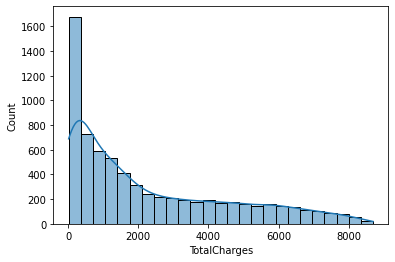

In [76]:
sns.histplot(df['TotalCharges'], kde=True)

In [77]:
# The TotalCharges distribution is highly right-skewed, with most customers having charges below $2,000.
# This suggests many are new or short-term users, while fewer have long-term, high total spending.
# The long tail indicates a small group of loyal, 
# high-value customers with extended service duration and higher monthly payments.

### 6. Bivariate Analysis

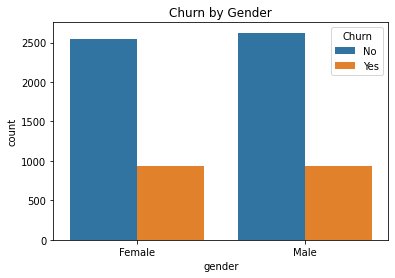

In [78]:
# 6. Bivariate Analysis

# Gender vs. Churn

sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Churn by Gender')
plt.show()

In [79]:
count_table = df.groupby(['gender','Churn']).size().unstack()
count_table_perc = count_table.div(count_table.sum(axis=1), axis=0) * 100

print(count_table)           # Counts
print("\nPercentages:\n", count_table_perc.round(1))

Churn     No  Yes
gender           
Female  2549  939
Male    2625  930

Percentages:
 Churn     No   Yes
gender            
Female  73.1  26.9
Male    73.8  26.2


In [80]:
# Among female customers, 26.9% have churned, while 73.1% stayed.
# Among male customers, 26.2% have churned, and 73.8% stayed.
# Churn rates are nearly identical across genders, with males showing a slightly lower churn.

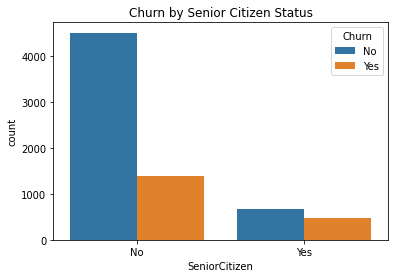

In [81]:
# SeniorCitizen vs Churn

# Although SeniorCitizen is stored as 0/1, it’s a categorical feature:

sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Churn by Senior Citizen Status')
plt.show()


In [82]:
count_table = pd.crosstab(df['SeniorCitizen'], df['Churn'])
count_table.index = count_table.index.map({0: 'No', 1: 'Yes'})  # Replace 0/1 with labels

count_table_perc = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
count_table_perc.index = count_table_perc.index.map({0: 'No', 1: 'Yes'})

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn            No   Yes
SeniorCitizen            
No             4508  1393
Yes             666   476

Percentages:
 Churn            No   Yes
SeniorCitizen            
No             76.4  23.6
Yes            58.3  41.7


In [83]:
# Among non-senior citizens, 23.6% churned, while 76.4% stayed.
# Among senior citizens, 41.7% churned, and only 58.3% stayed.
# Senior citizens have a significantly higher churn rate, 
# nearly 18 percentage points more than non-seniors, indicating they are more likely to leave the service.

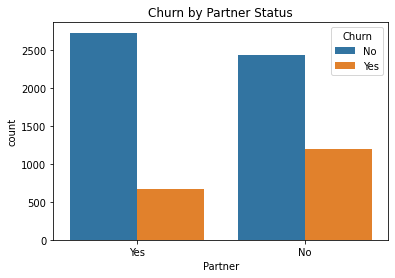

In [84]:
# Partner vs. Churn

sns.countplot(data=df, x='Partner', hue='Churn')
plt.title('Churn by Partner Status')
plt.show()

In [85]:
count_table = pd.crosstab(df['Partner'], df['Churn'])

count_table_perc = pd.crosstab(df['Partner'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669

Percentages:
 Churn      No   Yes
Partner            
No       67.0  33.0
Yes      80.3  19.7


In [86]:
# Customers without a partner have a churn rate of 33.0%, while those with a partner have a much lower churn rate of 19.7%.
# Having a partner is linked to higher customer retention, 
# suggesting partnered individuals are more likely to stay with the service.

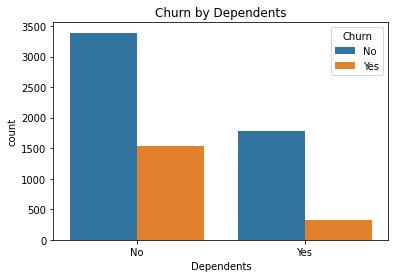

In [87]:
# Dependents vs. Churn

sns.countplot(data=df, x='Dependents', hue='Churn')
plt.title('Churn by Dependents')
plt.show()

In [88]:
count_table = df.groupby(['Dependents','Churn']).size().unstack()
count_table_perc = count_table.div(count_table.sum(axis=1), axis=0) * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326

Percentages:
 Churn         No   Yes
Dependents            
No          68.7  31.3
Yes         84.5  15.5


In [89]:
# Customers without dependents have a churn rate of 31.3%, while those with dependents churn at only 15.5%.
# Having dependents is associated with lower churn, 
# indicating that customers with family responsibilities may be more stable or committed to long-term service.

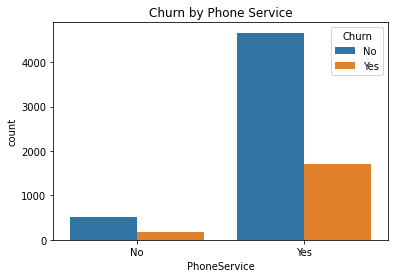

In [90]:
# PhoneService vs. Churn

sns.countplot(data=df, x='PhoneService', hue='Churn')
plt.title('Churn by Phone Service')
plt.show()

In [91]:
count_table = pd.crosstab(df['PhoneService'], df['Churn'])

count_table_perc = pd.crosstab(df['PhoneService'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn           No   Yes
PhoneService            
No             512   170
Yes           4662  1699

Percentages:
 Churn           No   Yes
PhoneService            
No            75.1  24.9
Yes           73.3  26.7


In [92]:
# Customers without phone service have a churn rate of 24.9%, 
# while those with phone service have a slightly higher churn rate of 26.7%.
# Phone service does not significantly affect churn, as both groups show similar churn rates.

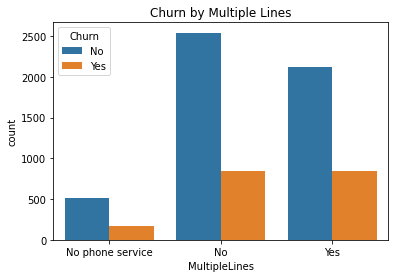

In [93]:
# MultipleLines vs. Churn

sns.countplot(data=df, x='MultipleLines', hue='Churn')
plt.title('Churn by Multiple Lines')
plt.show()

In [94]:
count_table = pd.crosstab(df['MultipleLines'], df['Churn'])

count_table_perc = pd.crosstab(df['MultipleLines'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn               No  Yes
MultipleLines              
No                2541  849
No phone service   512  170
Yes               2121  850

Percentages:
 Churn               No   Yes
MultipleLines               
No                75.0  25.0
No phone service  75.1  24.9
Yes               71.4  28.6


In [95]:
# Customers without multiple lines have a churn rate of 25.0%.
# Those with multiple lines churn at 28.6%, slightly higher.
# Customers with no phone service show a churn rate of 24.9%.
# Having multiple lines is slightly associated with higher churn, but differences across groups are relatively small.

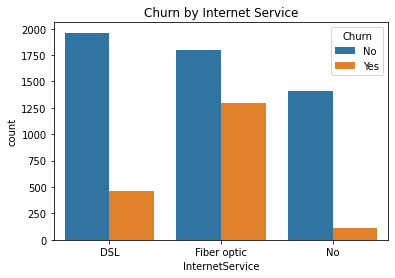

In [96]:
# InternetService vs. Churn

sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn by Internet Service')
plt.show()

In [97]:
count_table = pd.crosstab(df['InternetService'], df['Churn'])

count_table_perc = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113

Percentages:
 Churn              No   Yes
InternetService            
DSL              81.0  19.0
Fiber optic      58.1  41.9
No               92.6   7.4


In [98]:
# DSL customers have a churn rate of 19%, while those with Fiber optic experience a significantly higher churn rate at 41.9%. 
# Customers with no internet service have the lowest churn rate at just 7.4%. 
# In terms of absolute counts, DSL users have the highest number of non-churned customers (1962), followed by Fiber optic (1799). 
# The analysis highlights that churn is most prevalent among Fiber optic users,

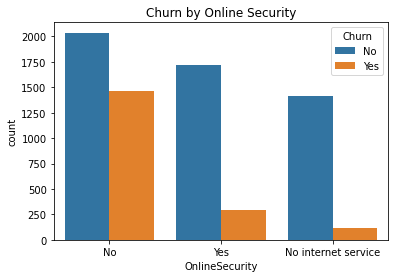

In [99]:
# OnlineSecurity vs. Churn

sns.countplot(data=df, x='OnlineSecurity', hue='Churn')
plt.title('Churn by Online Security')
plt.show()

In [100]:
count_table = pd.crosstab(df['OnlineSecurity'], df['Churn'])

count_table_perc = pd.crosstab(df['OnlineSecurity'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn                  No   Yes
OnlineSecurity                 
No                   2037  1461
No internet service  1413   113
Yes                  1724   295

Percentages:
 Churn                  No   Yes
OnlineSecurity                 
No                   58.2  41.8
No internet service  92.6   7.4
Yes                  85.4  14.6


In [101]:
# Customers without online security have a high churn rate of 41.8%.
# Those with online security churn much less at 14.6%.
# Customers with no internet service churn at just 7.4%.
# Lack of online security is strongly linked to higher churn, suggesting it’s a key retention feature for internet users.

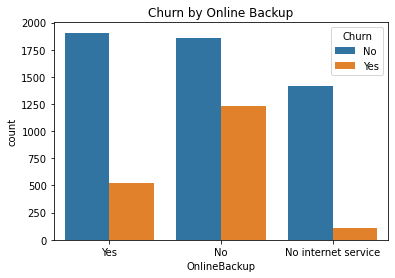

In [102]:
# OnlineBackup vs. Churn

sns.countplot(data=df, x='OnlineBackup', hue='Churn')
plt.title('Churn by Online Backup')
plt.show()

In [103]:
count_table = pd.crosstab(df['OnlineBackup'], df['Churn'])

count_table_perc = pd.crosstab(df['OnlineBackup'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn                  No   Yes
OnlineBackup                   
No                   1855  1233
No internet service  1413   113
Yes                  1906   523

Percentages:
 Churn                  No   Yes
OnlineBackup                   
No                   60.1  39.9
No internet service  92.6   7.4
Yes                  78.5  21.5


In [104]:
# Customers without online backup have a churn rate of 39.9%.
# Those with online backup churn at a much lower rate of 21.5%.
# Customers with no internet service have the lowest churn at 7.4%.
# Online backup appears to reduce churn, indicating it may play a role in customer satisfaction and retention.

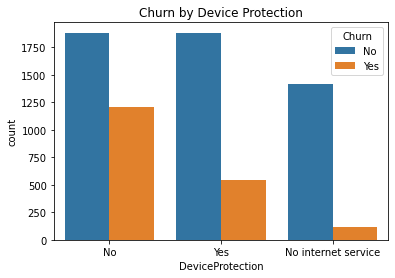

In [105]:
# DeviceProtection vs. Churn

sns.countplot(data=df, x='DeviceProtection', hue='Churn')
plt.title('Churn by Device Protection')
plt.show()

In [106]:
count_table = pd.crosstab(df['DeviceProtection'], df['Churn'])

count_table_perc = pd.crosstab(df['DeviceProtection'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn                  No   Yes
DeviceProtection               
No                   1884  1211
No internet service  1413   113
Yes                  1877   545

Percentages:
 Churn                  No   Yes
DeviceProtection               
No                   60.9  39.1
No internet service  92.6   7.4
Yes                  77.5  22.5


In [107]:
# Customers without device protection have a churn rate of 39.1%.
# Those with device protection churn at 22.5%, much lower.
# Customers with no internet service churn at 7.4%.
# Device protection is linked to lower churn, suggesting it contributes to customer satisfaction 
# and retention for internet users.

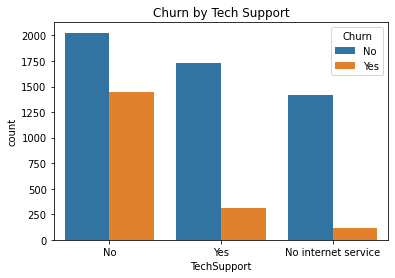

In [108]:
# TechSupport vs. Churn

sns.countplot(data=df, x='TechSupport', hue='Churn')
plt.title('Churn by Tech Support')
plt.show()

In [109]:
count_table = pd.crosstab(df['TechSupport'], df['Churn'])

count_table_perc = pd.crosstab(df['TechSupport'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn                  No   Yes
TechSupport                    
No                   2027  1446
No internet service  1413   113
Yes                  1734   310

Percentages:
 Churn                  No   Yes
TechSupport                    
No                   58.4  41.6
No internet service  92.6   7.4
Yes                  84.8  15.2


In [110]:
# Customers without tech support have a churn rate of 41.6%.
# Those with tech support churn at only 15.2%.
# Customers with no internet service churn at 7.4%.
# Lack of tech support is strongly associated with higher churn, 
# highlighting its importance in retaining internet service customers.

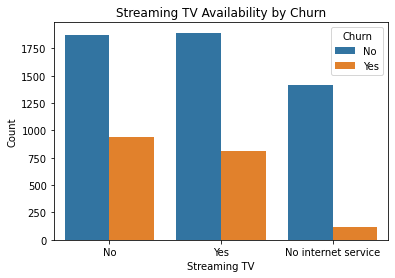

In [111]:
# StreamingTV by Churn

sns.countplot(data=df, x='StreamingTV', hue='Churn')
plt.title('Streaming TV Availability by Churn')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.show()

In [112]:
count_table = pd.crosstab(df['StreamingTV'], df['Churn'])

count_table_perc = pd.crosstab(df['StreamingTV'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn                  No  Yes
StreamingTV                   
No                   1868  942
No internet service  1413  113
Yes                  1893  814

Percentages:
 Churn                  No   Yes
StreamingTV                    
No                   66.5  33.5
No internet service  92.6   7.4
Yes                  69.9  30.1


In [113]:
# Customers without internet service have the lowest churn rate (7.4%), likely because they don’t use streaming services.
# Among customers with internet, those who do not stream TV have a higher churn rate (33.5%) 
# compared to those who do stream TV (30.1%).
# Overall, streaming TV customers tend to stay longer than non-streamers.

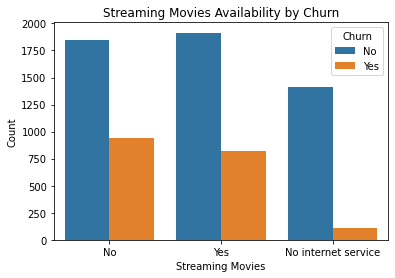

In [114]:
# Streaming Movies by Churn

sns.countplot(data=df, x='StreamingMovies', hue='Churn')
plt.title('Streaming Movies Availability by Churn')
plt.xlabel('Streaming Movies')
plt.ylabel('Count')
plt.show()

In [115]:
count_table = pd.crosstab(df['StreamingMovies'], df['Churn'])

count_table_perc = pd.crosstab(df['StreamingMovies'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn                  No  Yes
StreamingMovies               
No                   1847  938
No internet service  1413  113
Yes                  1914  818

Percentages:
 Churn                  No   Yes
StreamingMovies                
No                   66.3  33.7
No internet service  92.6   7.4
Yes                  70.1  29.9


In [116]:
# Customers without internet service have the lowest churn rate (7.4%), similar to the StreamingTV data.
# Among internet users, those who don’t stream movies have a higher churn rate (33.7%) than those who do stream movies (29.9%).
# Streaming movie users are slightly less likely to churn than non-streamers.

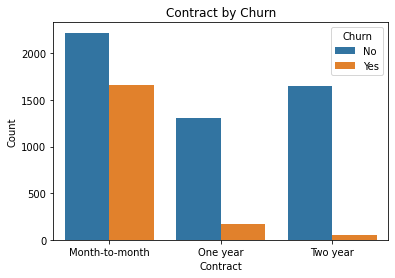

In [117]:
# Contract by Churn

sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Contract by Churn')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

In [118]:
count_table = pd.crosstab(df['Contract'], df['Churn'])

count_table_perc = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48

Percentages:
 Churn             No   Yes
Contract                  
Month-to-month  57.3  42.7
One year        88.7  11.3
Two year        97.2   2.8


In [119]:
# Month-to-month customers have the highest churn rate (42.7%).
# One-year contract customers churn much less (11.3%).
# Two-year contracts have the lowest churn rate (2.8%).
# Longer contracts are strongly linked to lower churn.

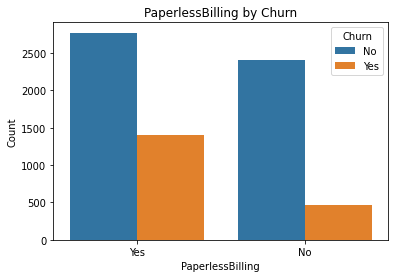

In [120]:
# PaperlessBilling by churn

sns.countplot(data=df, x='PaperlessBilling', hue='Churn')
plt.title('PaperlessBilling by Churn')
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')
plt.show()

In [121]:
count_table = pd.crosstab(df['PaperlessBilling'], df['Churn'])

count_table_perc = pd.crosstab(df['PaperlessBilling'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn               No   Yes
PaperlessBilling            
No                2403   469
Yes               2771  1400

Percentages:
 Churn               No   Yes
PaperlessBilling            
No                83.7  16.3
Yes               66.4  33.6


In [122]:
# Customers with paperless billing have a much higher churn rate (33.6%) than those without it (16.3%).
# Paper billing is associated with lower churn, possibly indicating more traditional or stable customer behavior.

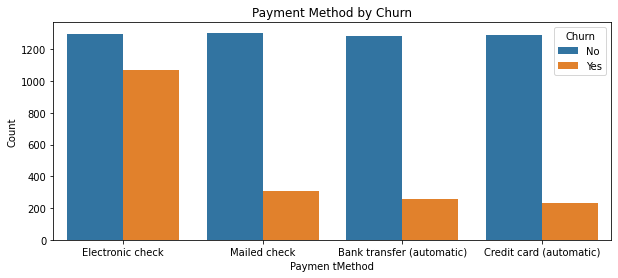

In [123]:
# Payment Method by churn

plt.figure(figsize=(10,4))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Payment Method by Churn')
plt.xlabel('Paymen tMethod')
plt.ylabel('Count')
plt.show()

In [124]:
count_table = pd.crosstab(df['PaymentMethod'], df['Churn'])

count_table_perc = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308

Percentages:
 Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  83.3  16.7
Credit card (automatic)    84.8  15.2
Electronic check           54.7  45.3
Mailed check               80.9  19.1


In [125]:
# Electronic check users have the highest churn rate (45.3%) by far.
# Automatic payments (bank transfer or credit card) have the lowest churn rates (15.2–16.7%).
# Mailed checks show a moderate churn rate (19.1%).
# Overall, automatic payments are linked to lower churn, while electronic check users churn the most.

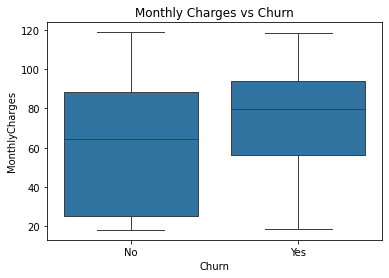

In [126]:
# Numerical vs. Target (Churn)

# MonthlyCharges vs. Churn 

sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges vs Churn')
plt.show()

In [127]:
# Customers who churned generally had higher monthly charges compared to those who did not churn.
# The median monthly charge for churned customers is significantly higher.
# This suggests that higher monthly costs may be linked to higher churn risk.

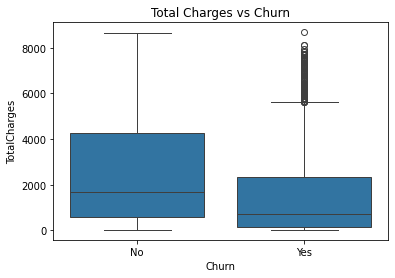

In [128]:
# # Total Charges vs. Churn 

sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('Total Charges vs Churn')
plt.show()

In [129]:
# Customers who did not churn tend to have higher total charges, likely because they stayed longer.
# Churned customers generally have lower total charges, suggesting shorter customer lifespans.
# There are some high-charge outliers among churned customers, but most are clustered at the lower end.
# This supports the idea that churned customers often leave early, before accumulating high total charges.

In [130]:
df.groupby('Churn')[['tenure', 'MonthlyCharges']].mean()

,tenure,MonthlyCharges
Churn,,
No,37.569965,61.265124
Yes,17.979133,74.441332


In [131]:
# Customers who did not churn had an average tenure of 37.57 months and paid $61.27 monthly,
# while churned customers had a shorter average tenure of 17.98 months and paid a higher average of $74.44,
# So, we can say that shorter-tenured, higher-paying customers are more likely to churn.

In [132]:
df['ChurnBinary'] = df['Churn'].map({'No': 0, 'Yes': 1})
df[['tenure', 'MonthlyCharges', 'ChurnBinary']].corr()

,tenure,MonthlyCharges,ChurnBinary
tenure,1.000000,0.247900,-0.352229
MonthlyCharges,0.247900,1.000000,0.193356
ChurnBinary,-0.352229,0.193356,1.000000


### 7. Multivariate Analysis

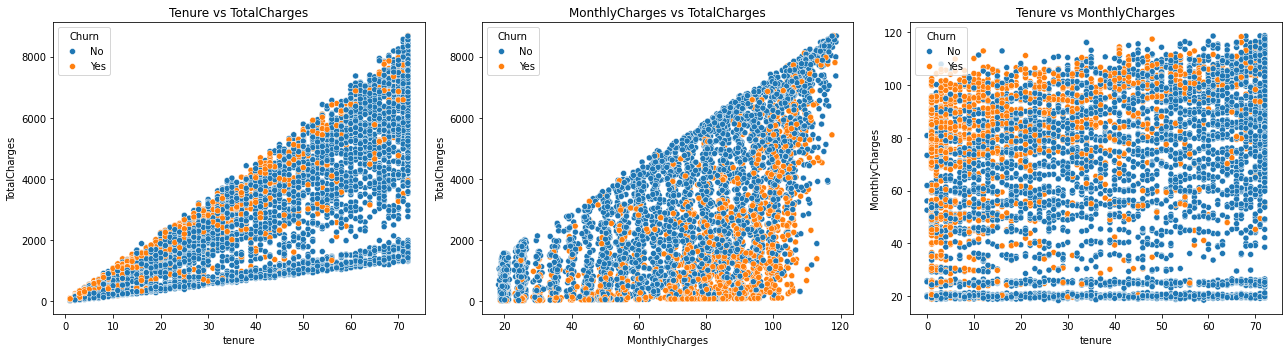

In [137]:
# 7. Multivariate Analysis

# Numerical vs Numerical:

# Define figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Tenure vs TotalCharges
sns.scatterplot(data=df, x='tenure', y='TotalCharges', hue='Churn', ax=axes[0])
axes[0].set_title('Tenure vs TotalCharges')

# 2. MonthlyCharges vs TotalCharges
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', ax=axes[1])
axes[1].set_title('MonthlyCharges vs TotalCharges')

# 3. Tenure vs MonthlyCharges
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', ax=axes[2])
axes[2].set_title('Tenure vs MonthlyCharges')

plt.tight_layout()
plt.show()

In [ ]:
# Tenure vs TotalCharges (Left Plot)
# Pattern: Strong upward linear trend.
# Insight: As tenure increases, total charges increase — expected because charges accumulate over time.
# Churn insight: Orange dots (churned) are clustered at lower tenure and lower total charges, indicating early exits.

# MonthlyCharges vs TotalCharges (Middle Plot)
# Pattern: Moderate upward triangle-shaped spread.
# Insight: Higher monthly charges lead to higher total charges, but variation increases with plan cost.
# Churn insight: Orange churners are more common in the high monthly charges & low total charges area 
# these are likely new customers on expensive plans.

# Tenure vs MonthlyCharges (Right Plot)
# Pattern: Very weak or no clear trend.
# Insight: Monthly charges are not strongly linked to tenure — customers can be new or old regardless of plan cost.
# Churn insight: Churn is higher at short tenure and high monthly charges, again reinforcing the trend

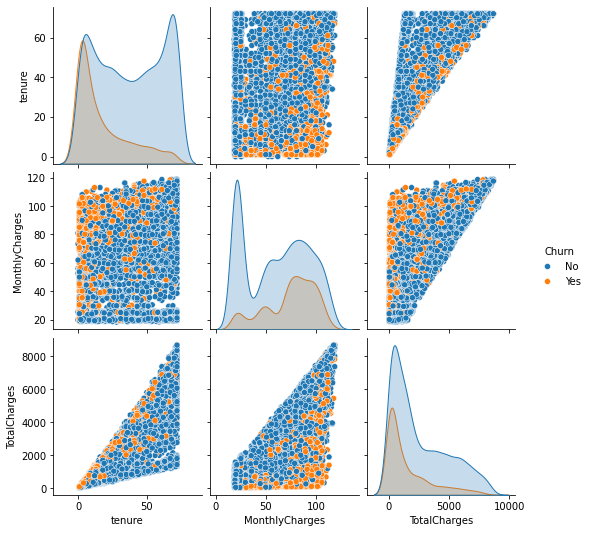

In [138]:
# All Numeric vs Churn

sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')

In [ ]:
# 1. Tenure vs TotalCharges
# Very strong positive linear correlation (as tenure increases, TotalCharges increases).
# Churned customers (orange) are mostly concentrated in lower tenure and lower TotalCharges — they tend to leave early.

# 2. Tenure vs MonthlyCharges
# No strong correlation.
# Churned customers appear more frequent at lower tenure regardless of monthly charge, especially for mid-to-high charges.

# 3. MonthlyCharges vs TotalCharges
# Weak overall linear trend, but more scatter for churned customers.
# Churned users are seen across a wide range of MonthlyCharges but still cluster toward lower TotalCharges.

# 4. Diagonal Histograms/KDEs
# Tenure: Clear separation — churned customers peak at lower tenure.
# MonthlyCharges: Churners skew toward higher charges.
# TotalCharges: Churners mostly on the lower end.

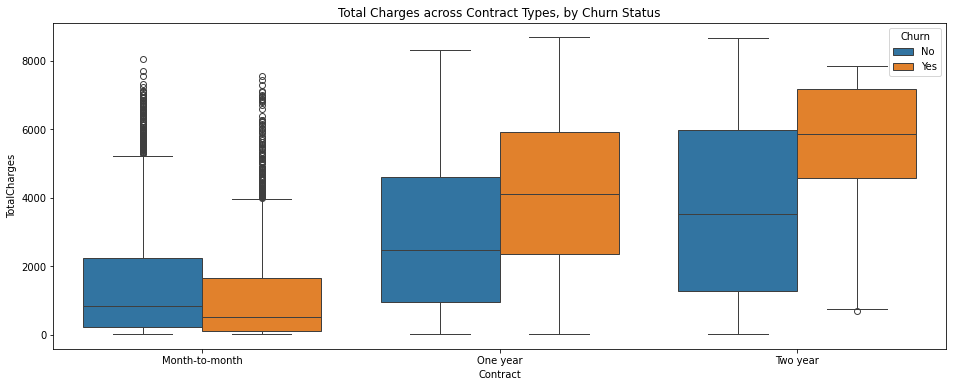

In [141]:
# Numerical vs categorical
# TotalCharges and Contract and Churn 

# This will show how TotalCharges vary across Contract types and how it relates to Churn.

plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')

plt.title('Total Charges across Contract Types, by Churn Status')
plt.show()

In [137]:
# The boxplot shows that customers on month-to-month contracts have the highest churn rate and generally lower TotalCharges.
# In contrast, one-year and two-year contract customers churn less and tend to have higher TotalCharges,
# especially those who stay. 
# The spread of charges is wider for month-to-month customers, indicating variability in billing,
# while longer contracts show more consistent charges. 
# Overall, churn is strongly associated with shorter contracts, suggesting that 
# longer commitments reduce churn and increase revenue per customer.

In [138]:
# Summary Table – Grouped statistics

summary = df.groupby(['Contract','Churn'])['TotalCharges'].describe()
print(summary)

                       count         mean          std     min        25%  \
Contract       Churn                                                        
Month-to-month No     2220.0  1521.927590  1690.054484   18.85   223.3625   
               Yes    1655.0  1164.460574  1481.646935   18.85    94.2000   
One year       No     1306.0  2903.569908  2196.071516   18.80   938.7250   
               Yes     166.0  4066.212048  2230.122564   28.30  2359.9500   
Two year       No     1637.0  3678.986103  2567.323227   20.35  1269.1000   
               Yes      48.0  5432.363542  2098.707593  692.10  4591.1375   

                           50%        75%      max  
Contract       Churn                                
Month-to-month No      830.525  2251.6625  8061.50  
               Yes     514.000  1649.6500  7548.10  
One year       No     2477.300  4598.0250  8309.55  
               Yes    4098.525  5910.6250  8684.80  
Two year       No     3527.000  5968.4000  8672.45  
            

In [139]:
# Churned customers have lower average TotalCharges in month-to-month contracts (mean: $1164 vs. $1522 for non-churned).

# For One-year and Two-year contracts, churned customers show higher average charges, 
# likely due to churn occurring late in long-term contracts (e.g., $5432 for churned vs. $3679 for non-churned in Two-year).

# Standard deviation is highest in Two-year contracts, reflecting wider variation in charges.

# Median and quartile values also rise with contract length, confirming that longer contracts lead to higher TotalCharges.

# Overall, churn is most frequent and lowest-value in month-to-month contracts.

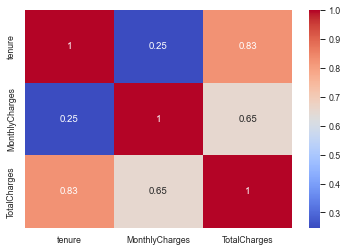

In [116]:
# Correlation Between Tenure, Monthly Charges, and Total Charges

num_data = df[['tenure','MonthlyCharges','TotalCharges']]
sns.heatmap(num_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Tenure & TotalCharges --0.83-- Strong positive correlation — the longer a customer stays, the more they are billed in total.
# MonthlyCharges & TotalCharges --0.65-- Moderate positive correlation — higher monthly fees lead to higher total charges.
# Tenure & MonthlyCharges --0.25-- Weak positive correlation — tenure is not strongly linked with the price plan.

In [145]:
# correlation between the numeric features and the target:


# Create the target binary
df['Churn_binary'] = df['Churn'].map({'No': 0, 'Yes': 1})

# List of numeric columns
num_data = df[['tenure','MonthlyCharges','TotalCharges','Churn_binary']]

# Correlation Matrix
corr_matrix = num_data.corr()

# Show the full table
print("Correlation Matrix:\n", corr_matrix)

# Extract just the correlation of the target
target_corr = corr_matrix['Churn_binary'].sort_values(ascending=False)
print("\nCorrelation of target with features:\n", target_corr)


Correlation Matrix:
                   tenure  MonthlyCharges  TotalCharges  Churn_binary
tenure          1.000000        0.247900      0.825880     -0.352229
MonthlyCharges  0.247900        1.000000      0.651065      0.193356
TotalCharges    0.825880        0.651065      1.000000     -0.199484
Churn_binary   -0.352229        0.193356     -0.199484      1.000000

Correlation of target with features:
 Churn_binary      1.000000
MonthlyCharges    0.193356
TotalCharges     -0.199484
tenure           -0.352229
Name: Churn_binary, dtype: float64


In [ ]:
# The correlation matrix shows that tenure has the strongest negative correlation with churn (-0.35), 
# indicating that longer-tenured customers are less likely to churn. 
# TotalCharges also shows a weak negative correlation (-0.20), while MonthlyCharges has a weak positive correlation (0.19). 
# This suggests that customers with shorter tenures and higher monthly fees are more prone to churn.

In [142]:
# Use Chi-square tests for:

# Contract, InternetService, TechSupport, etc. vs Churn

for col in ['Contract', 'InternetService', 'TechSupport']:
    table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"{col} vs Churn - p-value: {p:.4f}")

Contract vs Churn - p-value: 0.0000
InternetService vs Churn - p-value: 0.0000
TechSupport vs Churn - p-value: 0.0000


In [ ]:
# What "p-value: 0.0000" Means
# A p-value less than 0.05 (typically the threshold for statistical significance) means
# we reject the null hypothesis — the variables are not independent.
# Since your p-values are extremely small, there’s strong evidence that churn behavior depends on these features.

# Contract:There is a significant association between Contract type and Churn.
# InternetService: Churn behavior varies significantly across different Internet services.
# TechSupport: Whether or not a customer has Tech Support is strongly linked to Churn.